In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from ast import literal_eval
import os


In [20]:
tritles = pd.read_csv('../data/trigram_titles_pos_w2v.csv')


In [21]:
tritles.head()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec
0,all's well,1,"['DT', 'POS', 'NN']",DT,POS,NN,"['all', ""'s"", 'well']",[[-1.81372836e-01 1.97823837e-01 -7.73134887e...
1,the devil drives,1,"['DT', 'NN', 'NNS']",DT,NN,NNS,"['the', 'devil', 'drives']",[[-9.59224224e-01 1.22396159e+00 -6.39906406e...
2,edge of hazard,1,"['NN', 'IN', 'NN']",NN,IN,NN,"['edge', 'of', 'hazard']",[[-2.87398398e-02 -7.36244917e-02 1.42647075e...
3,a mingled yarn,1,"['DT', 'VBN', 'NN']",DT,VBN,NN,"['a', 'mingled', 'yarn']",[[ 3.78270075e-03 3.85284066e-01 -8.90050769e...
4,love is enough,1,"['NN', 'VBZ', 'JJ']",NN,VBZ,JJ,"['love', 'is', 'enough']",[[-6.29614413e-01 -7.17607141e-01 -1.16408551e...


In [22]:
tritles.index.is_unique

True

The word has been stored as a string.

In [23]:
tritles.iloc[0,7]

'[[-1.81372836e-01  1.97823837e-01 -7.73134887e-01 -1.37400717e-01\n   1.96527988e-01 -2.71843016e-01 -1.01639181e-01 -2.59809881e-01\n   9.88298357e-02 -4.10954840e-02 -6.99804246e-01 -1.84434760e+00\n  -4.46527153e-02  1.36760017e-02 -2.34908089e-01  7.59720206e-01\n  -2.08220091e-02  5.13405085e-01  2.54235834e-01 -3.61591391e-02\n   3.98522645e-01 -2.12866917e-01  8.29012990e-01  6.99454069e-01\n   7.28334248e-01  3.79640341e-01  2.17093498e-01  2.46753603e-01\n   9.07730162e-01  1.84097022e-01  3.13963145e-01  9.87460837e-02\n   1.87620446e-02  5.84735751e-01  4.71847177e-01 -3.12919527e-01\n   2.85119832e-01 -1.59338742e-01  9.23518956e-01 -8.69607329e-01\n  -6.39527023e-01 -6.56869769e-01  7.20195353e-01 -1.49445027e-01\n  -1.51594535e-01 -5.36990128e-02 -2.60717422e-01  1.26484251e+00\n   5.94473034e-02 -1.35708541e-01 -4.34748173e-01  3.68215591e-01\n   8.23520005e-01 -4.26308066e-02 -1.34145415e+00 -4.40769851e-01\n   7.77703524e-01 -1.11511469e+00  2.96835601e-01 -6.76195323

In [12]:
tritles['word_vec2']=tritles['word_vec'].apply(lambda x: literal_eval(x))

SyntaxError: invalid syntax (<unknown>, line 1)

**HUGE** thanks to stackoverflow for this one. I was ready to go back to bed. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe

In [27]:
result = tritles['word_vec'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))

In [32]:
len(result[1])

600

This split the wordvecs into one large 600 element vector, rather than 3 200 element vectors. I cannot figure out how to fix it, and I'm running out of time. This will be quick and dirty here.

In [45]:
vec1 = []
vec2 = []
vec3 = []

for i in result:
    vec1.append(i[0:200])
    vec2.append(i[200:400])
    vec3.append(i[400:])
    
tritles['vec1'] = vec1
tritles['vec2'] = vec2
tritles['vec3'] = vec3

In [46]:
tritles.sample()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec,vec1,vec2,vec3
230,do for money,0,"['VB', 'IN', 'NN']",VB,IN,NN,"['do', 'for', 'money']",[[-5.64624608e-01 -5.12021065e-01 -1.17289269e...,"[-0.564624608, -0.512021065, -1.17289269, 0.00...","[-0.730259776, -0.0950055048, -0.382897794, -0...","[-0.0542504415, -0.1242925, -0.238900557, -0.1..."


In [131]:
vec3 = tritles.vec3.tolist()

for item in vec3:
    if len(item) != 200:
        print('yes')

In [132]:
title_vec = []

for index, row in tritles.iterrows():
    new_vec = []
    new_vec.append(row['vec1'])
    new_vec.append(row['vec2'])
    new_vec.append(row['vec3'])
    title_vec.append(new_vec)


In [133]:
len(title_vec)

389

In [135]:
tritles['title_vec'] = title_vec

In [136]:
tritles.sample()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec,vec1,vec2,vec3,title_vec
157,to take arms,1,"['TO', 'VB', 'NNS']",TO,VB,NNS,"['to', 'take', 'arms']",[[-1.16125548e+00 4.17104214e-01 -3.87518018e...,"[-1.16125548, 0.417104214, -0.387518018, -0.09...","[-0.609587848, 0.0898125693, -0.994344175, 0.0...","[-0.149089426, -0.153491467, -0.327489436, -0....","[[-1.16125548, 0.417104214, -0.387518018, -0.0..."


In [245]:
tritles['result'] = result
tritles.sample()

,title,good_title,pos,pos1,pos2,pos3,title_token,word_vec,vec1,vec2,vec3,title_vec,result
94,bid time return,1,"['NN', 'NN', 'NN']",NN,NN,NN,"['bid', 'time', 'return']",[[-7.69946396e-01 8.33220556e-02 -2.26814449e...,"[-0.769946396, 0.0833220556, -0.226814449, 0.0...","[-0.393670291, 0.198632717, -0.975979328, -0.2...","[-0.192687765, -0.11369627, -0.528518617, 0.03...","[[-0.769946396, 0.0833220556, -0.226814449, 0....","[-0.769946396, 0.0833220556, -0.226814449, 0.0..."


In [246]:
v_length = [len(vec) for vec in tritles.result]
len(v_length)

389

In [248]:
print(set(v_length))

{600}


## Try 1: Word Embedding##

In [298]:
X1 = tritles[['vec1', 'vec2', 'vec3']]
y = tritles[['good_title']].to_numpy()

In [299]:
X1.head()

,vec1,vec2,vec3
0,"[-0.181372836, 0.197823837, -0.773134887, -0.1...","[0.533072054, 0.456044883, 0.839015186, -1.043...","[0.0737399161, -1.16558611, -1.33562589, -0.05..."
1,"[-0.959224224, 1.22396159, -0.639906406, -0.51...","[-0.136978582, -0.262594491, -0.226922512, -0....","[-0.0353104249, -0.0204622857, 0.0873904899, -..."
2,"[-0.0287398398, -0.0736244917, 0.0142647075, -...","[-0.311327934, -0.266869843, 1.77387714, -0.93...","[-0.0696778893, -0.140246749, -0.0611646064, 0..."
3,"[0.00378270075, 0.385284066, -0.890050769, 0.6...","[-0.0234753769, -0.0381344706, 0.0521896631, -...","[0.00223998143, -0.0186114572, -0.00538241072,..."
4,"[-0.629614413, -0.717607141, -1.16408551, -0.0...","[-0.0893845335, -0.509242773, -0.135309592, -1...","[-0.206095338, -0.359155834, -0.451801538, 0.0..."


In [300]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25)

print('X1_train shape:', X1_train.shape)
print('X1_test shape:', X1_test.shape)

X1_train shape: (291, 3)
X1_test shape: (98, 3)


In [304]:
X1_train = X1_train.to_numpy()
X1_test = X1_test.to_numpy()

Quick RandomForest to see if these are finally in the proper format

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

rf = RandomForestClassifier()

In [312]:
rf_model = rf.fit(X1_train, y1_train.ravel())

ValueError: setting an array element with a sequence.

X1_train is numpy.ndarray of length 291. Each element is an ndarray of length 3:
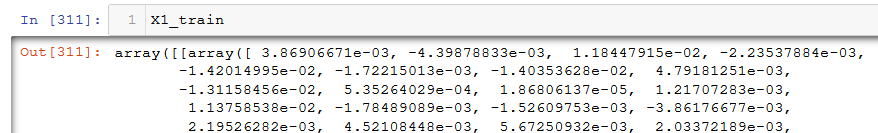

## Try 2: Word Embedding ##

In [274]:
X2 = tritles['result'].tolist()
y2 = tritles['good_title'].to_numpy()

In [275]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25)


In [276]:
rf_model2 = rf.fit(X2_train, y2_train.ravel())

In [277]:
y2_pred = rf_model2.predict(X2_test)

In [278]:
precision = precision_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred)
print('Precision: {} / Recall: {}'.format(
    round(precision, 3), 
    round(recall, 3)))

Precision: 0.939 / Recall: 0.92


X2_train is a list of length 291, and looks like:
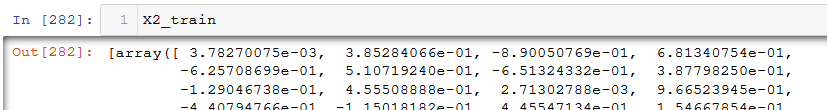

### Try 2.2: Word Embedding ###

In [271]:
X4 = tritles['title_vec'].tolist()

In [272]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.25)

In [273]:
rf_model4 = rf.fit(X4_train, y4_train.ravel())

ValueError: Found array with dim 3. Estimator expected <= 2.

Stackoverflow tells me that `Found array with dim 3. Estimator expected <= 2` translates to : sklearn works only with 2D data. X4_train is a list of 291 elements, each element consisting of 3 word vectors

###  Gradient Boosting ###

Try with GradientBoostingClassifier on the X2_train set above.

In [314]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=3, max_depth = 3)
    gb.fit(X2_train, y2_train.ravel())
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X2_train, y2_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X2_test, y2_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.942
Accuracy score (validation): 0.918

Learning rate:  0.1
Accuracy score (training): 0.959
Accuracy score (validation): 0.857

Learning rate:  0.25
Accuracy score (training): 0.986
Accuracy score (validation): 0.867

Learning rate:  0.5
Accuracy score (training): 0.997
Accuracy score (validation): 0.908

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.898

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.847



In [315]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.05, max_features=3, max_depth=3)
gb.fit(X2_train, y2_train.ravel())
y2_pred = gb.predict(X2_test)

print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        48
           1       0.84      0.96      0.90        50

    accuracy                           0.89        98
   macro avg       0.90      0.89      0.89        98
weighted avg       0.90      0.89      0.89        98

[[39  9]
 [ 2 48]]


## POS Tagging ##

In [345]:
X3 = tritles[['pos1', 'pos2', 'pos3']]

In [346]:
X3  = pd.get_dummies(X3, prefix=['pos1', 'pos2', 'pos3'], columns=['pos1', 'pos2', 'pos3'])

print('X3 shape:', X3.shape)

X3 shape: (389, 81)


In [347]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=46)

print('X3_train shape:', X3_train.shape)
print('X3_test shape:', X3_test.shape)

X3_train shape: (291, 81)
X3_test shape: (98, 81)


In [348]:
X3_train = X3_train.to_numpy()
X3_test = X3_test.to_numpy()

### Random Forest ###

In [349]:
rf_model = rf.fit(X3_train, y3_train.ravel())

In [350]:
y3_pred = rf_model.predict(X3_test)

In [351]:
precision = precision_score(y3_test, y3_pred)
recall = recall_score(y3_test, y3_pred)
print('Precision: {} / Recall: {}'.format(
    round(precision, 3), 
    round(recall, 3)))

Precision: 0.915 / Recall: 0.86


In [360]:
print(confusion_matrix(y3_test, y3_pred))

[[44  4]
 [ 7 43]]


### Repeat with get_dummies(drop_first=True) ###

In [353]:
X5 = tritles[['pos1', 'pos2', 'pos3']]

In [354]:
X5  = pd.get_dummies(X5, prefix=['pos1', 'pos2', 'pos3'], columns=['pos1', 'pos2', 'pos3'], drop_first=True)
print('X5 shape:', X5.shape)

X5 shape: (389, 78)


In [355]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.25, random_state=46)

print('X5_train shape:', X5_train.shape)
print('X5_test shape:', X5_test.shape)

X5_train shape: (291, 78)
X5_test shape: (98, 78)


In [356]:
X5_train = X5_train.to_numpy()
X5_test = X5_test.to_numpy()

In [357]:
rf_model5 = rf.fit(X5_train, y5_train.ravel())
y5_pred = rf_model5.predict(X5_test)

In [358]:
precision = precision_score(y5_test, y5_pred)
recall = recall_score(y5_test, y5_pred)
print('Precision: {} / Recall: {}'.format(
    round(precision, 3), 
    round(recall, 3)))

Precision: 0.933 / Recall: 0.84


In [359]:
print(confusion_matrix(y5_test, y5_pred))

[[45  3]
 [ 8 42]]


### Gradient Boosting ###

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc

In [361]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=3, max_depth = 3)
    gb.fit(X3_train, y3_train.ravel())
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X3_train, y3_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X3_test, y3_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.863
Accuracy score (validation): 0.827

Learning rate:  0.1
Accuracy score (training): 0.883
Accuracy score (validation): 0.857

Learning rate:  0.25
Accuracy score (training): 0.876
Accuracy score (validation): 0.847

Learning rate:  0.5
Accuracy score (training): 0.900
Accuracy score (validation): 0.847

Learning rate:  0.75
Accuracy score (training): 0.921
Accuracy score (validation): 0.847

Learning rate:  1
Accuracy score (training): 0.928
Accuracy score (validation): 0.898



In [362]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=3, max_depth = 5)
gb.fit(X3_train, y3_train.ravel())
y3_pred = gb.predict(X3_test)

print(classification_report(y3_test, y3_pred))
print(confusion_matrix(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.86      0.88      0.87        50

    accuracy                           0.87        98
   macro avg       0.87      0.87      0.87        98
weighted avg       0.87      0.87      0.87        98

[[41  7]
 [ 6 44]]


In [363]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=3, max_depth = 3)
    gb.fit(X5_train, y5_train.ravel())
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X5_train, y5_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X5_test, y5_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.883
Accuracy score (validation): 0.847

Learning rate:  0.1
Accuracy score (training): 0.845
Accuracy score (validation): 0.837

Learning rate:  0.25
Accuracy score (training): 0.890
Accuracy score (validation): 0.867

Learning rate:  0.5
Accuracy score (training): 0.900
Accuracy score (validation): 0.878

Learning rate:  0.75
Accuracy score (training): 0.907
Accuracy score (validation): 0.878

Learning rate:  1
Accuracy score (training): 0.914
Accuracy score (validation): 0.898



In [364]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=3, max_depth = 5)
gb.fit(X5_train, y5_train.ravel())
y5_pred = gb.predict(X5_test)

print(classification_report(y5_test, y5_pred))
print(confusion_matrix(y5_test, y5_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        48
           1       0.91      0.86      0.89        50

    accuracy                           0.89        98
   macro avg       0.89      0.89      0.89        98
weighted avg       0.89      0.89      0.89        98

[[44  4]
 [ 7 43]]


In [369]:
y5_prob = gb.predict_proba(X5_test)
y5_prob[:, 1]

array([9.28957299e-01, 4.89184023e-02, 4.87434227e-02, 9.90999824e-01,
       8.37213903e-02, 3.39899512e-02, 1.23132852e-01, 5.58340916e-01,
       9.19444791e-01, 8.68161856e-04, 9.12568167e-01, 1.26984782e-01,
       8.25110500e-01, 2.26275998e-01, 1.33938980e-02, 1.83065223e-02,
       1.53260204e-02, 1.47794815e-02, 5.34342384e-01, 2.70516111e-02,
       9.97883541e-01, 6.19908849e-03, 5.58340916e-01, 9.90784376e-01,
       5.01270119e-03, 9.12568167e-01, 9.28957299e-01, 1.42764751e-02,
       7.79276485e-01, 6.84736575e-02, 3.67666114e-02, 9.40293478e-01,
       5.86440828e-02, 1.63379081e-03, 9.90999824e-01, 9.96695189e-03,
       3.98821872e-02, 5.32356228e-01, 2.26474004e-01, 9.28957299e-01,
       4.62427785e-01, 5.46980646e-01, 3.29830362e-01, 9.06650480e-01,
       7.79276485e-01, 5.32356228e-01, 9.28957299e-01, 9.06121388e-01,
       8.35478855e-02, 6.71784789e-03, 4.76021894e-01, 4.13570766e-02,
       9.19444791e-01, 9.90999824e-01, 1.00334529e-02, 3.54931731e-02,
      

In [373]:
y5_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)